# Problem Statement

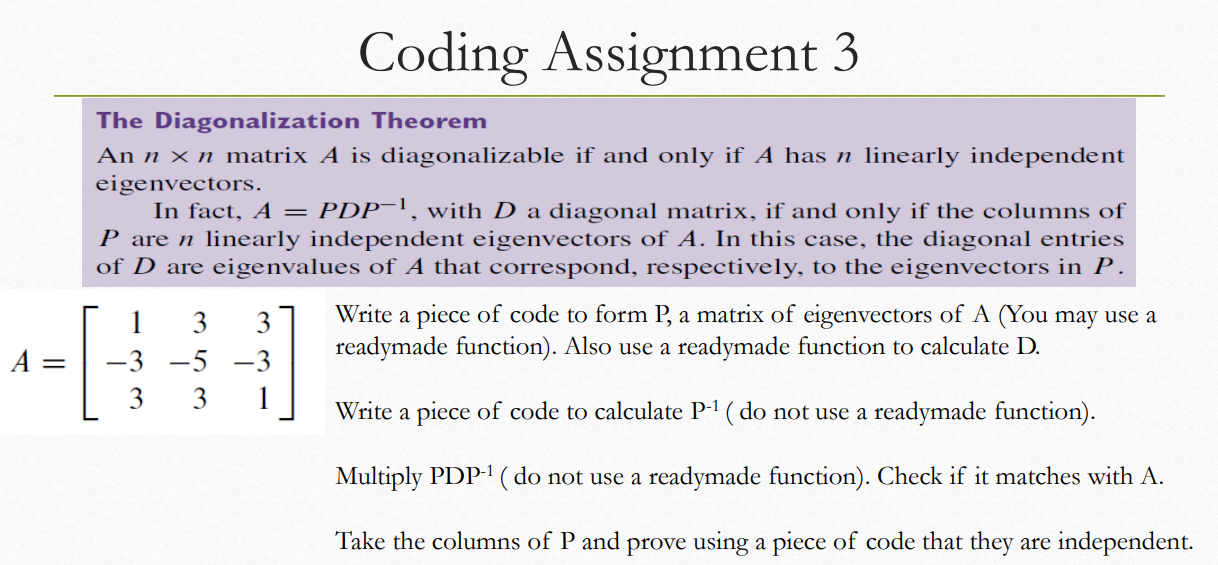

# Solution

**Step1:** Find eigen values and eigen vectors to form P and D \
**Step2:** Define a function to find inverse of a matrix to calculate P inverse \
**Step3:** Define a function for matrix multiplication to find the products of P and D and P inverse \
**Step4:** Check whether the product(P * D * Pinv) value matches with the original matrix or not \
**Step5:** Prove that columns of P are independent

In [21]:
import numpy as np
from numpy import linalg

A=np.array([[1,3,3],[-3,-5,-3],[3,3,1]])
print("A:",A)
eigenvalues,eigenvectors=linalg.eig(A)
print("eigen vectors:",eigenvectors)
print("eigen values:",eigenvalues)

#form P and D
P=eigenvectors
print("P:",P)
D=np.diag(eigenvalues)
print("D:",D)

A: [[ 1  3  3]
 [-3 -5 -3]
 [ 3  3  1]]
eigen vectors: [[-0.57735027 -0.78762616  0.42064462]
 [ 0.57735027  0.20744308 -0.81636981]
 [-0.57735027  0.58018308  0.3957252 ]]
eigen values: [ 1. -2. -2.]
P: [[-0.57735027 -0.78762616  0.42064462]
 [ 0.57735027  0.20744308 -0.81636981]
 [-0.57735027  0.58018308  0.3957252 ]]
D: [[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]


In [29]:
def inverse(matrix):
    
    #find size of matrix
    n=len(matrix)
    
    #create a augmented matrix
    augmented_matrix=np.hstack((matrix,np.identity(n)))

    for i in range(n):
        
        #make the diagonal element to 1
        diagonal_element=augmented_matrix[i][i]
        augmented_matrix[i]/=diagonal_element
        
        #make all other elements below the diagonal element to 0
        for j in range(n):
            if j!=i:
                element=augmented_matrix[j][i]
                augmented_matrix[j]-=(element*augmented_matrix[i])
                
    #extract the inverse matrix from augmented matrix
    inverse=augmented_matrix[:,n:]
    print("inverse matrix:",inverse)
    return inverse
        
P_inverse=inverse(P)

inverse matrix: [[-1.73205081 -1.73205081 -1.73205081]
 [-0.75691664 -0.04484052  0.71207612]
 [-1.41727082 -2.46126427 -1.04399344]]


In [32]:
def matrix_multiplication(matrix1,matrix2):
    
    #find rows and columns of both matrices
    rowsA=len(matrix1)
    colsA=len(matrix1[0])
    rowsB=len(matrix2)
    colsB=len(matrix2[0])
    
    if rowsB!=colsA:
        print("Matrix multiplication is not possible")
              
    #initialize resultant matrix
    result=np.zeros((rowsA,colsB))
    for i in range(rowsA):
        for j in range(colsB):
            for k in range(rowsB):
                result[i][j]+=matrix1[i][k]*matrix2[k][j]
    return result

C=matrix_multiplication(D,P_inverse)
calculated_A=matrix_multiplication(P,C)

In [34]:
#check whether calculated A matches with original A or not
if np.allclose(A,calculated_A):
    print("The A obtained through the product of P and D and P inverse matches with original A")
else:
    print("The A obtained through the product of P and D and P inverse does not match with original A")
    

The A obtained through the product of P and D and P inverse matches with original A


In [35]:
rank=linalg.matrix_rank(P)
print("Rank of the matrix:",rank)
cols=len(P[0])
print("No.of columns of the matrix:",cols)

if rank==cols:
    print("Columns of the matrix P are independent")
else:
    print("Columns of the matrix P are dependent")

Rank of the matrix: 3
No.of columns of the matrix: 3
Columns of the matrix P are independent
